In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d5bd4f118b74db69f914f6fff609f615


In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | nicoya
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | saint-leu
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | terrace
Processing Record 10 of Set 1 | nioro
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | yumen
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | panino
Processing Record 18 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | killybegs
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 

Processing Record 36 of Set 4 | wakkanai
Processing Record 37 of Set 4 | yekaterinoslavka
Processing Record 38 of Set 4 | sorong
Processing Record 39 of Set 4 | san quintin
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | mingguang
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | buala
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | vigrestad
Processing Record 47 of Set 4 | akonolinga
Processing Record 48 of Set 4 | deputatskiy
Processing Record 49 of Set 4 | kaduy
Processing Record 50 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | nan
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | kyshtovka
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | huaraz
Processing Record 7 of Set 5 | east london
Processing Record 

Processing Record 23 of Set 8 | bokspits
City not found. Skipping...
Processing Record 24 of Set 8 | bergerac
Processing Record 25 of Set 8 | ballina
Processing Record 26 of Set 8 | klaksvik
Processing Record 27 of Set 8 | raichur
Processing Record 28 of Set 8 | chake chake
Processing Record 29 of Set 8 | homer
Processing Record 30 of Set 8 | simpang
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | tagusao
Processing Record 33 of Set 8 | oranjestad
Processing Record 34 of Set 8 | clyde river
Processing Record 35 of Set 8 | musiri
Processing Record 36 of Set 8 | tateyama
Processing Record 37 of Set 8 | kendari
Processing Record 38 of Set 8 | san juan
Processing Record 39 of Set 8 | batagay
Processing Record 40 of Set 8 | dongsheng
Processing Record 41 of Set 8 | neijiang
Processing Record 42 of Set 8 | usinsk
Processing Record 43 of Set 8 | mirai
Processing Record 44 of Set 8 | parainen
City not found. Skipping...
Processing Record 45 of Set 8 | san rafael
Proc

Processing Record 5 of Set 12 | segou
Processing Record 6 of Set 12 | sangar
Processing Record 7 of Set 12 | lira
Processing Record 8 of Set 12 | luau
Processing Record 9 of Set 12 | jumla
Processing Record 10 of Set 12 | kloulklubed
Processing Record 11 of Set 12 | kampot
Processing Record 12 of Set 12 | were ilu
Processing Record 13 of Set 12 | bondo
Processing Record 14 of Set 12 | maceio
Processing Record 15 of Set 12 | srivardhan
Processing Record 16 of Set 12 | namatanai
Processing Record 17 of Set 12 | beya
Processing Record 18 of Set 12 | hovd
Processing Record 19 of Set 12 | yarmouth
Processing Record 20 of Set 12 | olafsvik
City not found. Skipping...
Processing Record 21 of Set 12 | suriapet
Processing Record 22 of Set 12 | karasjok
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | kalmar
Processing Record 25 of Set 12 | talgar
Processing Record 26 of Set 12 | amga
Processing Record 27 of Set 12 | kodinsk
Processing Record 28 of Set 12 | innisfail
P

In [21]:
len(city_data)

520

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.57,72.64,80.92,82,21,13.24,IN,2019-11-05 23:07:52
1,Nicoya,10.15,-85.45,87.80,55,20,13.87,CR,2019-11-05 23:07:52
2,Busselton,-33.64,115.35,54.00,66,45,5.14,AU,2019-11-05 23:03:10
3,Provideniya,64.42,-173.23,26.60,79,40,6.71,RU,2019-11-05 23:07:52
4,Saint-Leu,-21.15,55.28,73.40,60,88,6.93,RE,2019-11-05 23:07:52
5,San Patricio,-26.98,-56.83,71.80,85,50,7.72,PY,2019-11-05 23:07:52
6,Cape Town,-33.93,18.42,66.00,88,75,11.41,ZA,2019-11-05 23:05:06
7,Cherskiy,68.75,161.30,12.54,76,63,4.16,RU,2019-11-05 23:07:27
8,Terrace,54.52,-128.61,48.20,81,75,3.36,CA,2019-11-05 23:07:53
9,Nioro,13.79,-15.05,86.81,35,69,8.52,GM,2019-11-05 23:07:53


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df_new_order = city_data_df[new_column_order]
city_data_df_new_order.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2019-11-05 23:07:52,10.57,72.64,80.92,82,21,13.24
1,Nicoya,CR,2019-11-05 23:07:52,10.15,-85.45,87.80,55,20,13.87
2,Busselton,AU,2019-11-05 23:03:10,-33.64,115.35,54.00,66,45,5.14
3,Provideniya,RU,2019-11-05 23:07:52,64.42,-173.23,26.60,79,40,6.71
4,Saint-Leu,RE,2019-11-05 23:07:52,-21.15,55.28,73.40,60,88,6.93
5,San Patricio,PY,2019-11-05 23:07:52,-26.98,-56.83,71.80,85,50,7.72
6,Cape Town,ZA,2019-11-05 23:05:06,-33.93,18.42,66.00,88,75,11.41
7,Cherskiy,RU,2019-11-05 23:07:27,68.75,161.30,12.54,76,63,4.16
8,Terrace,CA,2019-11-05 23:07:53,54.52,-128.61,48.20,81,75,3.36
9,Nioro,GM,2019-11-05 23:07:53,13.79,-15.05,86.81,35,69,8.52


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df_new_order.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

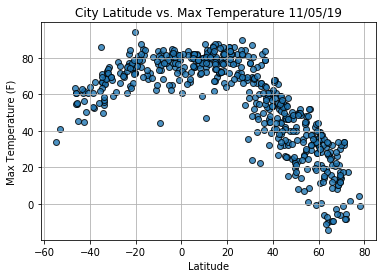

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

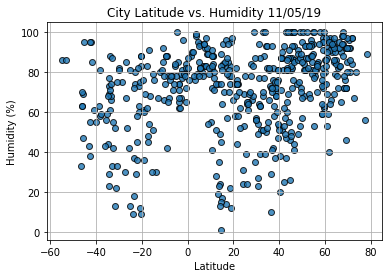

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

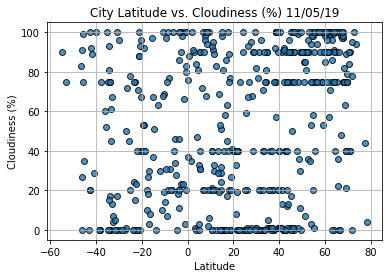

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()